# 데이터 병합[1. 회원정보, 2. 신용정보, 4. 청구입금정보]

In [2]:
import os
import gc
import pandas as pd

os.chdir('C:/Users/Money/Documents/final_project')

In [ ]:
# df21 = pd.read_parquet('train/1.회원정보/201807_train_회원정보.parquet')
# df22 = pd.read_parquet('train/1.회원정보/201808_train_회원정보.parquet')
# df23 = pd.read_parquet('train/1.회원정보/201809_train_회원정보.parquet')
# df24 = pd.read_parquet('train/1.회원정보/201810_train_회원정보.parquet')
# df25 = pd.read_parquet('train/1.회원정보/201811_train_회원정보.parquet')
# df26 = pd.read_parquet('train/1.회원정보/201812_train_회원정보.parquet')

# df21 = pd.read_parquet('train/2.신용정보/201807_train_신용정보.parquet')
# df22 = pd.read_parquet('train/2.신용정보/201808_train_신용정보.parquet')
# df23 = pd.read_parquet('train/2.신용정보/201809_train_신용정보.parquet')
# df24 = pd.read_parquet('train/2.신용정보/201810_train_신용정보.parquet')
# df25 = pd.read_parquet('train/2.신용정보/201811_train_신용정보.parquet')
# df26 = pd.read_parquet('train/2.신용정보/201812_train_신용정보.parquet')

# df21 = pd.read_parquet('train/4.청구입금정보/201807_train_청구정보.parquet')
# df22 = pd.read_parquet('train/4.청구입금정보/201808_train_청구정보.parquet')
# df23 = pd.read_parquet('train/4.청구입금정보/201809_train_청구정보.parquet')
# df24 = pd.read_parquet('train/4.청구입금정보/201810_train_청구정보.parquet')
# df25 = pd.read_parquet('train/4.청구입금정보/201811_train_청구정보.parquet')
# df26 = pd.read_parquet('train/4.청구입금정보/201812_train_청구정보.parquet')

df1 = pd.concat([df11,df12,df13,df14,df15,df16])

del df21
del df22
del df23
del df24
del df25
del df26
gc.collect()

NameError: name 'pd' is not defined

In [ ]:
# df2.to_parquet("1.회원정보_all_month.parquet")
# df2.to_parquet("2.신용정보_all_month.parquet")
# df2.to_parquet("4.청구입금정보_all_month.parquet")

# 분포 파악(histogram)

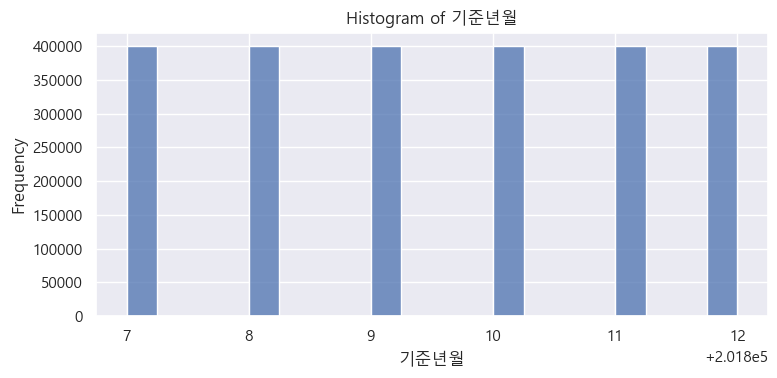

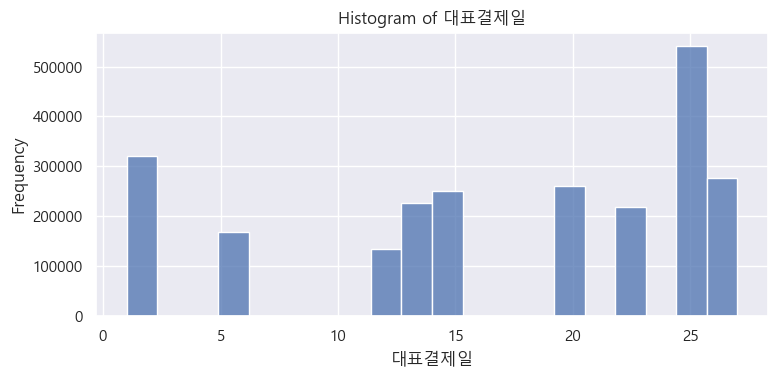

KeyboardInterrupt: 

<Figure size 800x400 with 0 Axes>

In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

# 수치형 변수만 선택
numeric_cols = df2.select_dtypes(include='number').columns

# 저장 폴더 생성
output_dir = "4.청구입금정보_plot"
os.makedirs(output_dir, exist_ok=True)

# 히스토그램 반복 출력
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df2[col], bins=20, kde=False)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    
    file_path = os.path.join(output_dir, f"{col}_hist.png")
    plt.savefig(file_path)
    
    plt.show()


# 데이터 파악(value_counts, describe)

In [ ]:
import pandas as pd


file_path = "4.청구입금정보_all_month.parquet"
dfT2 = pd.read_parquet("4.청구입금정보_all_month.parquet")

rows = []


for col in dfT2.columns:
    col_data = dfT2[col]

    column_name = col

    # 상위 20개
    vc = col_data.value_counts(dropna=False).head(20)
    vc_str = ", ".join([f"{k} : {v}" for k, v in vc.items()])

    # describe
    if pd.api.types.is_numeric_dtype(col_data):
        desc = col_data.describe()
        desc_str = ", ".join([f"{k} : {round(v, 2)}" for k, v in desc.items()])
        zero_count = int((col_data == 0).sum())
    else:
        desc_str = "해당 없음"
        zero_count = "해당 없음"

    rows.append({
        "column명": column_name,
        "value_counts": vc_str,
        "describe": desc_str,
        "0값 개수": zero_count
    })

summary_df = pd.DataFrame(rows)
summary_df.to_excel("[4.청구입금정보_des_전체한시트.xlsx", index=False)

# 상관계수 파악(heatmap)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터 load
df = pd.read_parquet("4.청구입금정보_all_month.parquet")

df_corr = df.copy()

for col in df_corr.select_dtypes(include='float64').columns:
    df_corr[col] = df_corr[col].astype('float32')

for col in df_corr.select_dtypes(include='int64').columns:
    df_corr[col] = df_corr[col].astype('int32')
    
# Label Encoding
for col in df_corr.select_dtypes(include=['object', 'category']).columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

corr_matrix = df_corr.corr()

plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Corr")
plt.tight_layout()
plt.show()

# VIF 파악

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_corr.select_dtypes(include='number').dropna()

X_const = add_constant(X)

# VIF
vif_df = pd.DataFrame()
vif_df["변수명"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_df = vif_df.sort_values("VIF", ascending=False)
print(vif_df)


c:\Users\Money\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Money\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\Money\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


               변수명  VIF
34      이용가능카드수_신용  inf
41        이용카드수_체크  inf
31        유효카드수_체크  inf
33    이용가능카드수_신용체크  inf
36      이용가능카드수_체크  inf
..             ...  ...
68  할인금액_제휴연회비_B0M  NaN
71   상품관련면제카드수_B0M  NaN
72    임직원면제카드수_B0M  NaN
73   우수회원면제카드수_B0M  NaN
74     기타면제카드수_B0M  NaN

[78 rows x 2 columns]
